<a href="https://colab.research.google.com/github/jamesee/Data-Analysis/blob/master/ExhaustiveFeatureSelector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


In [2]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3


In [4]:
X.shape

(1000, 10)

In [5]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, random_state=1)
# summarize data before the transform
print(X[:3, :])
# define the scaler
trans = MinMaxScaler()
# transform the data
X_norm = trans.fit_transform(X)
# summarize data after the transform
print(X_norm[:3, :])

[[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]
[[0.77608466 0.0239289  0.48251588 0.18352101 0.59830036]
 [0.40400165 0.79590304 0.27369632 0.6331332  0.42104156]
 [0.77065362 0.50132629 0.48207176 0.5076991  0.4293882 ]]


In [6]:
from pandas import read_csv
from sklearn.preprocessing import OneHotEncoder
# define the location of the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
# load the dataset
dataset = read_csv(url, header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# summarize the raw data
print(X[:3, :])
# define the one hot encoding transform
encoder = OneHotEncoder(sparse=False)
# fit and apply the transform to the input data
X_oe = encoder.fit_transform(X)
# summarize the transformed data
print(X_oe[:3, :])

[["'40-49'" "'premeno'" "'15-19'" "'0-2'" "'yes'" "'3'" "'right'"
  "'left_up'" "'no'"]
 ["'50-59'" "'ge40'" "'15-19'" "'0-2'" "'no'" "'1'" "'right'" "'central'"
  "'no'"]
 ["'50-59'" "'ge40'" "'35-39'" "'0-2'" "'no'" "'2'" "'left'" "'left_low'"
  "'no'"]]
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]]


In [8]:
import pandas as pd

X_df = pd.DataFrame(X)

In [9]:
X_df

,0,1,2,3,4,5,6,7,8
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no'
...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no'


In [11]:
X_ohe_df = pd.DataFrame(X_oe)
X_ohe_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
282,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
283,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
284,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
dataset

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [13]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import KBinsDiscretizer
# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, random_state=1)
# summarize data before the transform
print(X[:3, :])
# define the transform
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
# transform the data
X_discrete = trans.fit_transform(X)
# summarize data after the transform
print(X_discrete[:3, :])

[[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]
[[7. 0. 4. 1. 5.]
 [4. 7. 2. 6. 4.]
 [7. 5. 4. 5. 4.]]


In [14]:

# example of pca for dimensionality reduction
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=7, random_state=1)
# summarize data before the transform
print(X[:3, :])
# define the transform
trans = PCA(n_components=3)
# transform the data
X_dim = trans.fit_transform(X)
# summarize data after the transform
print(X_dim[:3, :])

[[-0.53448246  0.93837451  0.38969914  0.0926655   1.70876508  1.14351305
  -1.47034214  0.11857673 -2.72241741  0.2953565 ]
 [-2.42280473 -1.02658758 -2.34792156 -0.82422408  0.59933419 -2.44832253
   0.39750207  2.0265065   1.83374105  0.72430365]
 [-1.83391794 -1.1946668  -0.73806871  1.50947233  1.78047734  0.58779205
  -2.78506977 -0.04163788 -1.25227833  0.99373587]]
[[-1.64710578 -2.11683302  1.98256096]
 [ 0.92840209  4.8294997   0.22727043]
 [-3.83677757  0.32300714  0.11512801]]


Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


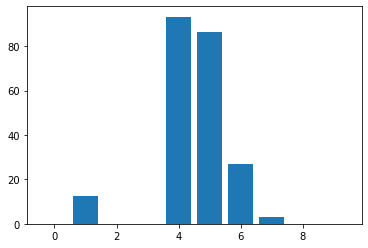

In [15]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


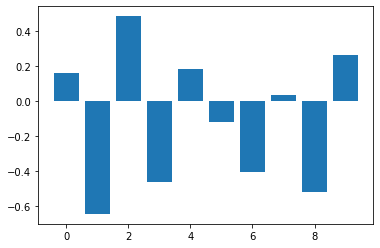

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [17]:

# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


In [28]:

# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


In [29]:
!pip install mlxtend

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Features: 15/15

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('0', '2', '3')


In [31]:
feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
efs1 = efs1.fit(X, y, custom_feature_names=feature_names)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best subset (corresponding names): ('sepal length', 'petal length', 'petal width')


In [32]:
efs1.subsets_

{0: {'avg_score': 0.6599999999999999,
  'cv_scores': array([0.53333333, 0.63333333, 0.73333333, 0.76666667, 0.63333333]),
  'feature_idx': (0,),
  'feature_names': ('sepal length',)},
 1: {'avg_score': 0.5866666666666667,
  'cv_scores': array([0.53333333, 0.66666667, 0.63333333, 0.53333333, 0.56666667]),
  'feature_idx': (1,),
  'feature_names': ('sepal width',)},
 2: {'avg_score': 0.9533333333333334,
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'feature_idx': (2,),
  'feature_names': ('petal length',)},
 3: {'avg_score': 0.9466666666666667,
  'cv_scores': array([0.96666667, 0.96666667, 0.93333333, 0.86666667, 1.        ]),
  'feature_idx': (3,),
  'feature_names': ('petal width',)},
 4: {'avg_score': 0.7266666666666667,
  'cv_scores': array([0.66666667, 0.8       , 0.63333333, 0.86666667, 0.66666667]),
  'feature_idx': (0, 1),
  'feature_names': ('sepal length', 'sepal width')},
 5: {'avg_score': 0.9466666666666667,
  'cv_scores': array([0.9666

In [33]:
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

feature_names = ('sepal length', 'sepal width',
                 'petal length', 'petal width')
efs1 = efs1.fit(X, y, custom_feature_names=feature_names)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
df

Features: 15/15

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.966...",0.973333,"(sepal length, petal length, petal width)",0.0171372,0.0133333,0.00666667
14,"(0, 1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length, sepal width, petal length, peta...",0.0270963,0.0210819,0.0105409
13,"(1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(sepal width, petal length, petal width)",0.0320608,0.0249444,0.0124722
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length,)",0.0514116,0.04,0.02
6,"(0, 3)","[0.9666666666666667, 0.9666666666666667, 0.9, ...",0.953333,"(sepal length, petal width)",0.0436915,0.0339935,0.0169967
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.9, ...",0.953333,"(petal length, petal width)",0.0436915,0.0339935,0.0169967
3,"(3,)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.946667,"(petal width,)",0.0581151,0.0452155,0.0226078
5,"(0, 2)","[0.9666666666666667, 1.0, 0.8666666666666667, ...",0.946667,"(sepal length, petal length)",0.0581151,0.0452155,0.0226078
7,"(1, 2)","[0.9666666666666667, 1.0, 0.9, 0.9333333333333...",0.946667,"(sepal width, petal length)",0.0436915,0.0339935,0.0169967
11,"(0, 1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.946667,"(sepal length, sepal width, petal width)",0.0436915,0.0339935,0.0169967


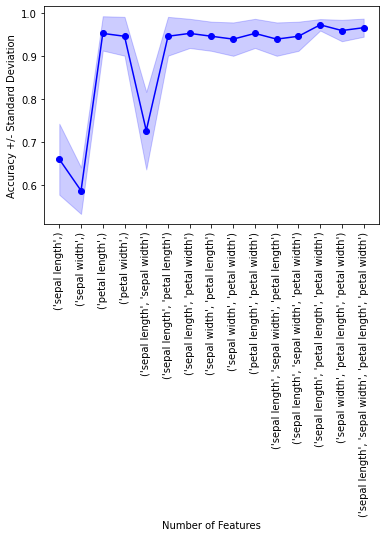

In [34]:
import matplotlib.pyplot as plt

metric_dict = efs1.get_metric_dict()

fig = plt.figure()
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

efs = EFS(lr, 
          min_features=10,
          max_features=12,
          scoring='neg_mean_squared_error',
          cv=10)

efs.fit(X, y, custom_feature_names=boston['feature_names'] )

print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)
print('Best subset:', efs.best_feature_names_)


Features: 377/377


Best subset: (0, 1, 4, 6, 7, 8, 9, 10, 11, 12)
Best subset: ('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


In [40]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')